# Clustering using Buildingsdataset

### Loading libraries

In [1]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale

### Loading Buidings dataset

In [2]:
buildings = pd.read_csv('ICAEN.csv')

In [3]:
buildings.columns

Index(['year', 'emissions', 'municipality', 'surface', 'compactness', 'demand',
       'gas_consume', 'electricity_consume', 'diesel_consume', 'eco_consume',
       'co2', 'energy'],
      dtype='object')

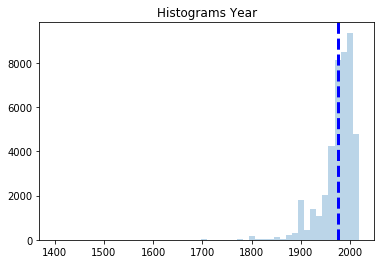

In [4]:
plt.title("Histograms Year")
plt.hist(buildings['year'], bins=50, alpha=0.3,range=[1400,2018])
plt.axvline(buildings['year'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

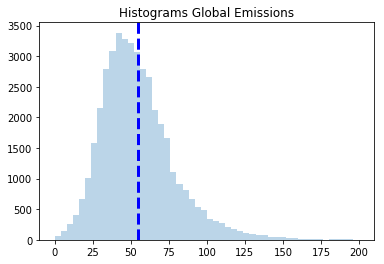

In [5]:
plt.title("Histograms Global Emissions")
plt.hist(buildings['emissions'], bins=50, alpha=0.3,range=[0,200])
plt.axvline(buildings['emissions'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

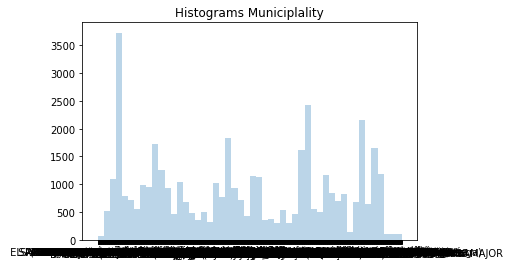

In [6]:
plt.title("Histograms Municiplality")
plt.hist(buildings['municipality'], bins=50, alpha=0.3)
plt.show()

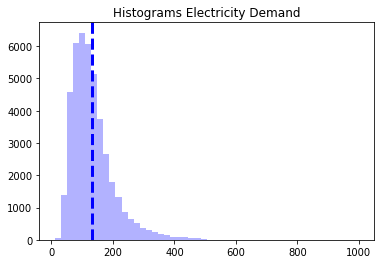

In [7]:
plt.title("Histograms Electricity Demand")
plt.hist(buildings['surface'], bins=50, alpha=0.3,range=[10,1000],color='b')
plt.axvline(buildings['surface'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

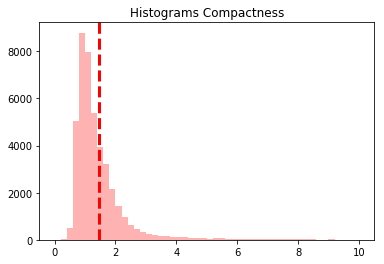

In [8]:
plt.title("Histograms Compactness")
plt.hist(buildings['compactness'], bins=50, alpha=0.3,range=[0,10],color='r')
plt.axvline(buildings['compactness'].mean(), color='r', linestyle='dashed', linewidth=3)
plt.show()

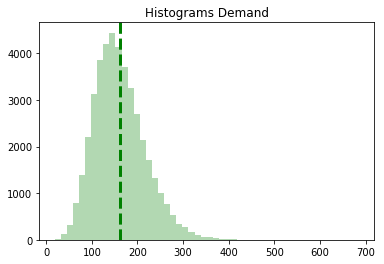

In [9]:
plt.title("Histograms Demand")
plt.hist(buildings['demand'], bins=50, alpha=0.3,color='g')
plt.axvline(buildings['demand'].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

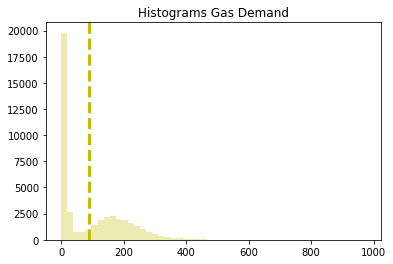

In [10]:
plt.title("Histograms Gas Demand")
plt.hist(buildings['gas_consume'], bins=50, alpha=0.3,color='y')
plt.axvline(buildings['gas_consume'].mean(), color='y', linestyle='dashed', linewidth=3)
plt.show()

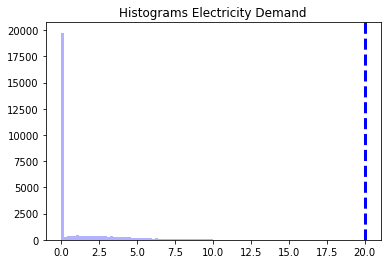

In [11]:
plt.title("Histograms Electricity Demand")
plt.hist(buildings['electricity_consume'], bins=50, alpha=0.3,color='b',range=[0,10])
plt.axvline(buildings['electricity_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

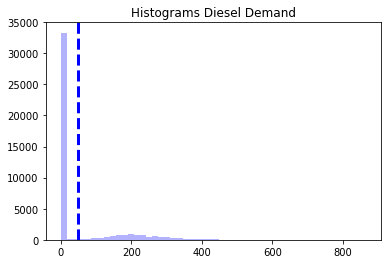

In [12]:
plt.title("Histograms Diesel Demand")
plt.hist(buildings['diesel_consume'], bins=50, alpha=0.3,color='b')
plt.axvline(buildings['diesel_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

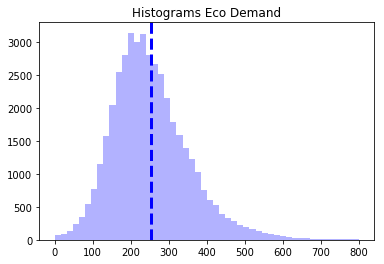

In [13]:
plt.title("Histograms Eco Demand")
plt.hist(buildings['eco_consume'], bins=50, alpha=0.3,color='b',range=[0,800])
plt.axvline(buildings['eco_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

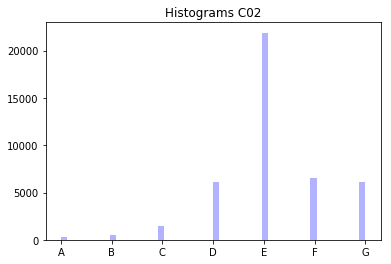

In [14]:
plt.title("Histograms C02")
plt.hist(buildings['co2'], bins=50, alpha=0.3,color='b')
plt.show()

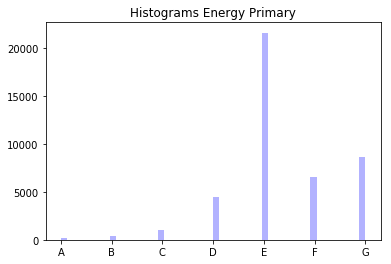

In [15]:
plt.title("Histograms Energy Primary")
plt.hist(buildings['energy'], bins=50, alpha=0.3,color='b')
plt.show()

From the previous graphs we can see that a couple of attributes will introduce a lot of noise to the sample so it won't be taken into consideration

In [16]:
buildings = buildings.drop(columns=['municipality'])

In [17]:
buildings.describe()

,year,emissions,surface,compactness,demand,gas_consume,electricity_consume,diesel_consume,eco_consume
count,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000
mean,1974.918424,54.747486,132.202737,1.462964,161.169241,90.193981,20.055395,49.249727,252.605437
std,34.626120,24.423985,68.493278,1.294691,55.869888,106.397569,42.625697,102.219165,103.025791
min,1400.000000,0.000000,17.100000,0.210000,18.310000,0.000000,0.000000,0.000000,0.000000
25%,1965.000000,38.170000,85.000000,0.910000,121.387500,0.000000,0.000000,0.000000,183.460000
50%,1983.000000,51.200000,118.000000,1.180000,154.765000,30.860000,1.145000,0.000000,239.245000
75%,1999.000000,66.862500,160.250000,1.630000,194.110000,171.822500,19.732500,0.000000,307.580000
max,2017.000000,394.140000,498.000000,104.370000,685.350000,973.940000,1190.760000,864.260000,2326.750000


In [18]:
buildings['energy'] = buildings['energy'].map(lambda x: ord(x))
buildings['co2']= buildings['co2'].map(lambda x: ord(x))

In [19]:
buildings = scale(buildings)

### Defining the number of clusters to produce

In [20]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, init_cluster='k-means++', tolerance=0.0001,loops=10,max_iterations=10,
                    jobs=16):

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=jobs)

        # Calculate Kmeans
        kmeans.fit(dataset)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

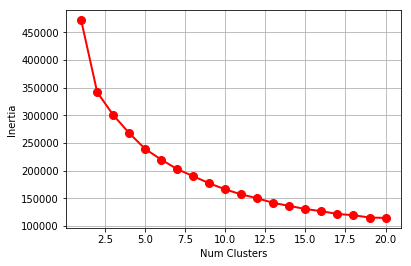

In [21]:
select_clusters(dataset = buildings,loops = 20)

Based on the graph three would work but let's follow up with a theory that the clusters actually belong to the CO2 emissions

## Cleaning municipality names

In [22]:
import unicodedata
import string

In [23]:
build = pd.read_csv('ICAEN.csv')
build['municipality'] = build['municipality'].map(
    lambda x: unicodedata.normalize('NFKD',
                                   x.lower()
                                   ).encode('ASCII', 'ignore').decode("utf-8") )

In [31]:
from fuzzywuzzy import process

In [49]:
choices =  pd.read_csv('dic.csv',header=None)
choices = choices[0]

In [62]:
build['municipality_clean'] = build['municipality'].map(
    lambda x: 
                                   process.extractOne(x,choices)
                                   )

In [65]:
build['municipality_clean'] = build['municipality_clean'].map(
    lambda x: 
                                   x[0]
                                   )

In [68]:
build.to_csv('buildings_clean', encoding='utf-8', index=False)

## Clustering buildings

In [182]:
model = KMeans(n_clusters=3,random_state=30)

In [183]:
model = KMeans(n_clusters=4,random_state=30)
model.fit(buildings)
buildings_predict = model.fit_predict(buildings)
buildings_predict

array([3, 2, 0, ..., 2, 3, 0], dtype=int32)

## Taking a look at the clustering

In [192]:
buildings_no_scale = pd.read_csv('ICAEN.csv')
colormap = np.array(['b', 'r', 'g','y'])
buildings_no_scale = buildings_no_scale.drop(columns=['municipality'])
buildings_no_scale.columns

Index(['year', 'emissions', 'surface', 'compactness', 'demand', 'gas_consume',
       'electricity_consume', 'diesel_consume', 'eco_consume', 'co2',
       'energy'],
      dtype='object')

Text(0.5,1,'Real Classification Demand and compactness')

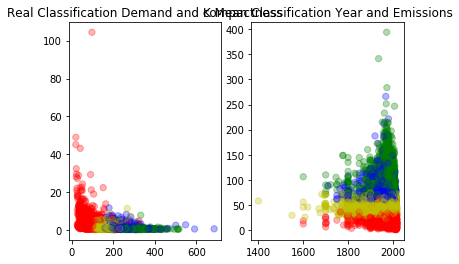

In [185]:
plt.subplot(1, 2, 2)
plt.scatter(buildings_no_scale['year'],buildings_no_scale['emissions'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification Year and Emissions')

plt.subplot(1, 2, 1)
plt.scatter(buildings_no_scale['demand'],buildings_no_scale['compactness'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('Real Classification Demand and compactness')

Text(0.5,1,'Real Classification Diesel and Eco')

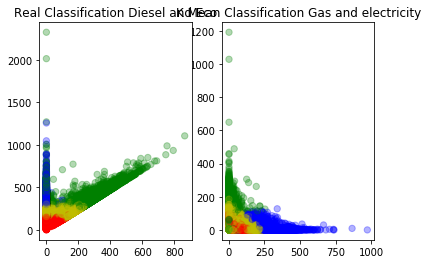

In [186]:
plt.subplot(1, 2, 2)
plt.scatter(buildings_no_scale['gas_consume'],buildings_no_scale['electricity_consume'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification Gas and electricity')

plt.subplot(1, 2, 1)
plt.scatter(buildings_no_scale['diesel_consume'],buildings_no_scale['eco_consume'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('Real Classification Diesel and Eco')

Text(0.5,1,'K Mean Classification Energy and C02')

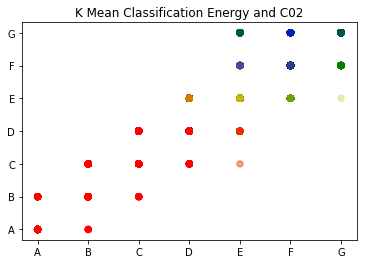

In [187]:
plt.scatter(buildings_no_scale['co2'],buildings_no_scale['energy'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification Energy and C02')

Text(0.5,1,'Real Classification Gas and Diesel')

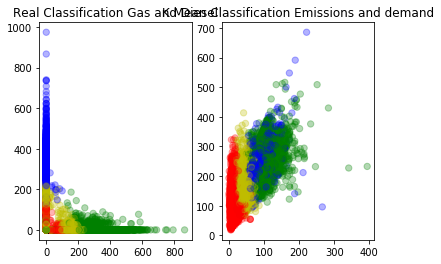

In [199]:
plt.subplot(1, 2, 2)
plt.scatter(buildings_no_scale['emissions'],buildings_no_scale['demand'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('K Mean Classification Emissions and demand')

plt.subplot(1, 2, 1)
plt.scatter(buildings_no_scale['diesel_consume'],buildings_no_scale['gas_consume'], c=colormap[model.labels_], s=40,alpha=0.3)
plt.title('Real Classification Gas and Diesel')

The clusters could be three if emisisons and demand were the only one taken into consideration but when using diesel and gas consume help us classify another cluster
There's one main cluster when using the energy and C02 attributes.

In [197]:
build['cluster'] = model.labels_
build.to_csv('buildings_clean_clusters', encoding='utf-8', index=False)

## Matrix correlation

In [200]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
    
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 10)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=15)
    ax1.set_yticklabels(labels,fontsize=15)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.25,0,0.5,0.75,0.85,1])
    plt.show()

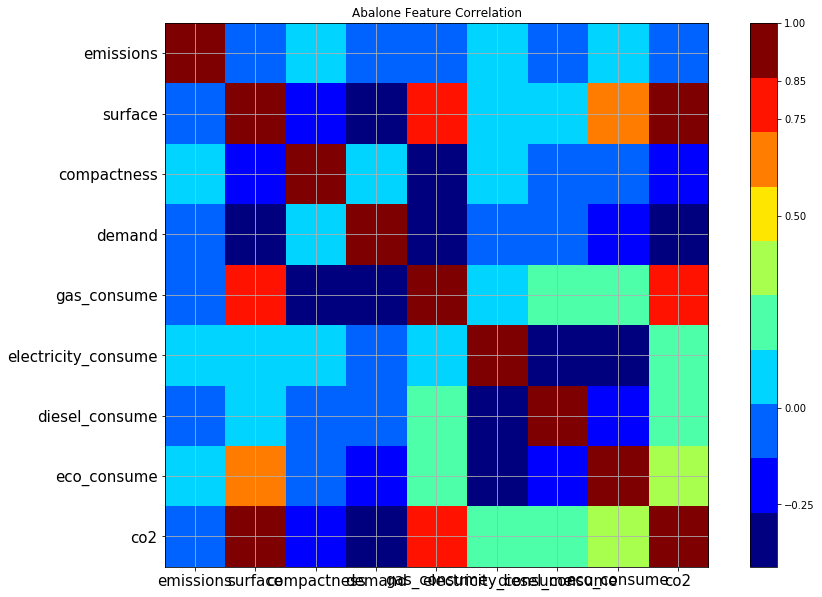

In [201]:
correlation_matrix(buildings_no_scale)

Based on the correlation matrix we can tell that there's a correlation between the surface or size of the apartment with the gas consume, which make sense since it is a bigger place it requires more gas to keep the heat. The CO2 emissions is related to the gas consume and againto the surface. 

The bigger the surface the 